In [1]:
import numpy as np
import pandas as pd
import vitaldb as vf
import matplotlib.pyplot as plt

datapath = 'data/'
savepath = 'dataset01/'

In [2]:
include_track_names = [
'SNUADC/ART',               # Arterial pressure wave                                W/500   mmHg
'SNUADC/ECG_II',            # ECG lead II wave                                      W/500   mV
'Solar8000/ART_DBP',        # Diastolic arterial pressure                           N       mmHg
'Solar8000/ART_MBP',        # Mean arterial pressure                                N       mmHg
'Solar8000/ART_SBP',        # Systolic arterial pressure                            N       mmHg
'Solar8000/ETCO2',          # End-tidal CO2                                         N       mmHg
'Solar8000/FEO2',           # Fraction of expired O2                                N       %
'Solar8000/FIO2',           # Fraction of inspired O2                               N       %
'Solar8000/HR',             # Heart rate                                            N       /min
'Solar8000/INCO2',          # Inspiratory CO2                                       N       mmHg
'Solar8000/PLETH_SPO2',     # Percutaneous oxygen saturation                        N       %
'Solar8000/RR_CO2',         # Respiratory rate based on capnography                 N       /min
'Primus/CO2',               # Capnography wave                                      W/62.5  mmHg
'Primus/ETCO2',             # End-tidal CO2                                         N       mmHg
'Primus/FEO2',              # Fraction of expired O2                                N       %
'Primus/FIO2',              # Fraction of inspired O2                               N       %
'Primus/INCO2',             # Inspiratory CO2                                       N       mmHg
'Primus/MV',                # Minute volume                                         N       L
'Primus/TV',                # Tidal volume                                          N       mL
'Orchestra/PPF20_CE',       # Effect-site concentration (propofol 20 mg/mL)         N       mcg/mL
'Orchestra/PPF20_CP',       # Plasma concentration (propofol 20 mg/mL)              N       mcg/mL
'Orchestra/PPF20_CT',       # Target concentration (propofol 20 mg/mL)              N       mcg/mL
'Orchestra/PPF20_RATE',     # Infusion rate (propofol 20 mg/mL)                     N       mL/hr
'Orchestra/PPF20_VOL',      # Infused volume (propofol 20 mg/mL)                    N       mL
'Orchestra/RFTN20_CE',      # Effect-site concentration (remifentanil 20 mcg/mL)    N       ng/mL
'Orchestra/RFTN20_CP',      # Plasma concentration (remifentanil 20 mcg/mL)         N       ng/mL
'Orchestra/RFTN20_CT',      # Target concentration (remifentanil 20 mcg/mL)         N       ng/mL
'Orchestra/RFTN20_RATE',    # Infusion rate (remifentanil 20 mcg/mL)                N       mL/hr
'Orchestra/RFTN20_VOL',     # Infused volume (remifentanil 20 mcg/mL)               N       mL
'BIS/BIS',                  # Bispectral index value                                N       unitless
]

In [3]:
from scipy import ndimage

def outlierfilter(data: pd.DataFrame,threshhold, iterations, min, max):
    gradient = np.diff(data,n=1, axis=0, append=0)
    gradientfilter = ndimage.binary_dilation(np.abs(gradient) > threshhold,iterations=iterations)

    # Apply Filter
    data[gradientfilter] = np.nan

    data[data <= min] = np.nan
    data[data > max] = np.nan

    data = data.interpolate(method = 'linear')
    data = data.bfill()
    return data

# End Tidal CO2

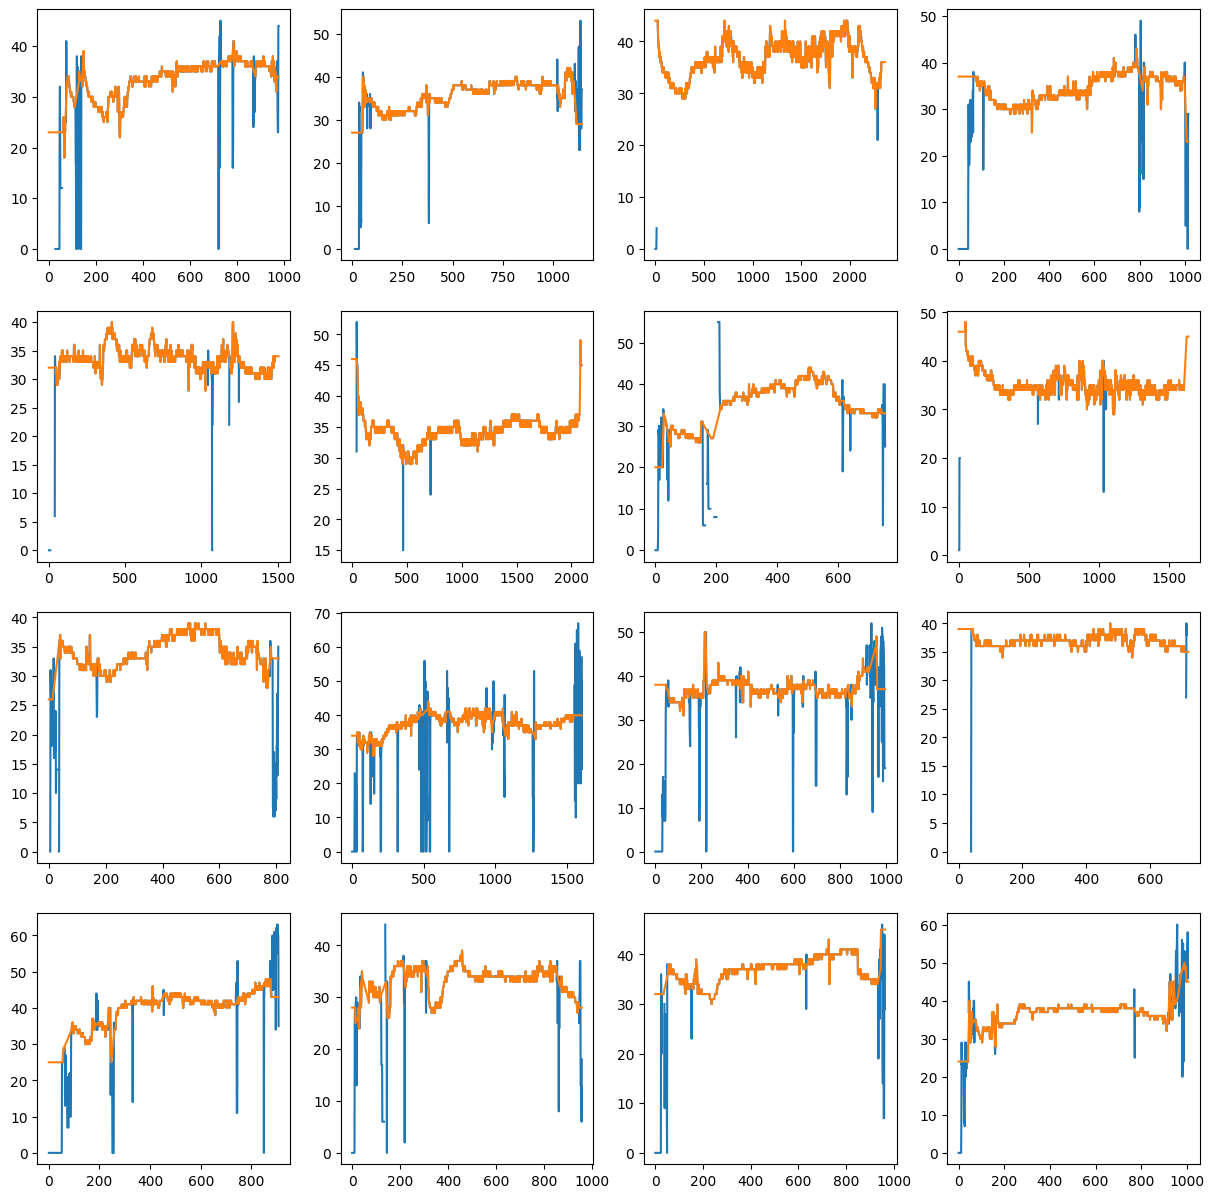

In [164]:
caseid = pd.read_csv(datapath + savepath +'dataset.csv', index_col=0).index.to_list()

track = ['Solar8000/ETCO2']

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, case in enumerate(caseid):
    filepath = datapath+'vitaldb_tiva/'+str(case).zfill(4)+'.vital'

    vitaldata = vf.VitalFile(ipath = filepath, track_names = track)
    vitaldata = vitaldata.to_pandas(track_names=track,interval=10)

    axs[i // 4][i % 4].plot(vitaldata.to_numpy())

    vitaldata = outlierfilter(vitaldata, 5, 2, 15, 50)

    axs[i // 4][i % 4].plot(vitaldata)
    plt.show
    if i+1 >= 16:
        break

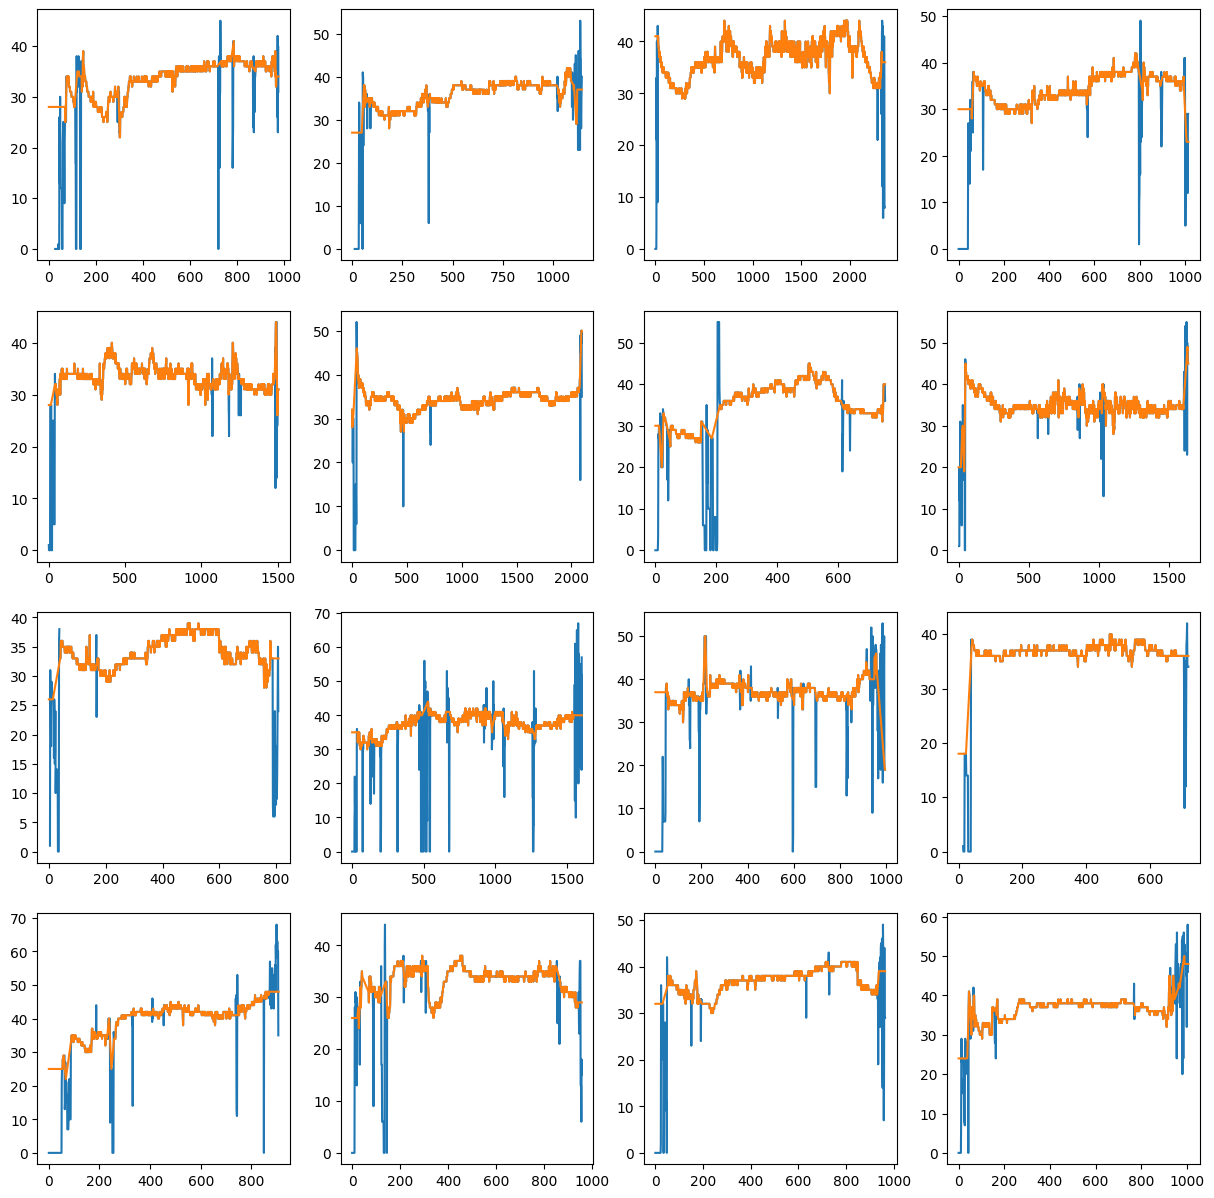

In [15]:
caseid = pd.read_csv(datapath + savepath +'dataset.csv', index_col=0).index.to_list()

track = ['Primus/ETCO2']

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, case in enumerate(caseid):
    filepath = datapath+'vitaldb_tiva/'+str(case).zfill(4)+'.vital'

    vitaldata = vf.VitalFile(ipath = filepath, track_names = track)
    vitaldata = vitaldata.to_pandas(track_names=track,interval=10)

    axs[i // 4][i % 4].plot(vitaldata.to_numpy())

    vitaldata = outlierfilter(vitaldata, 5, 2, 15, 50)

    axs[i // 4][i % 4].plot(vitaldata)
    plt.show
    if i+1 >= 16:
        break

# Blutdruck

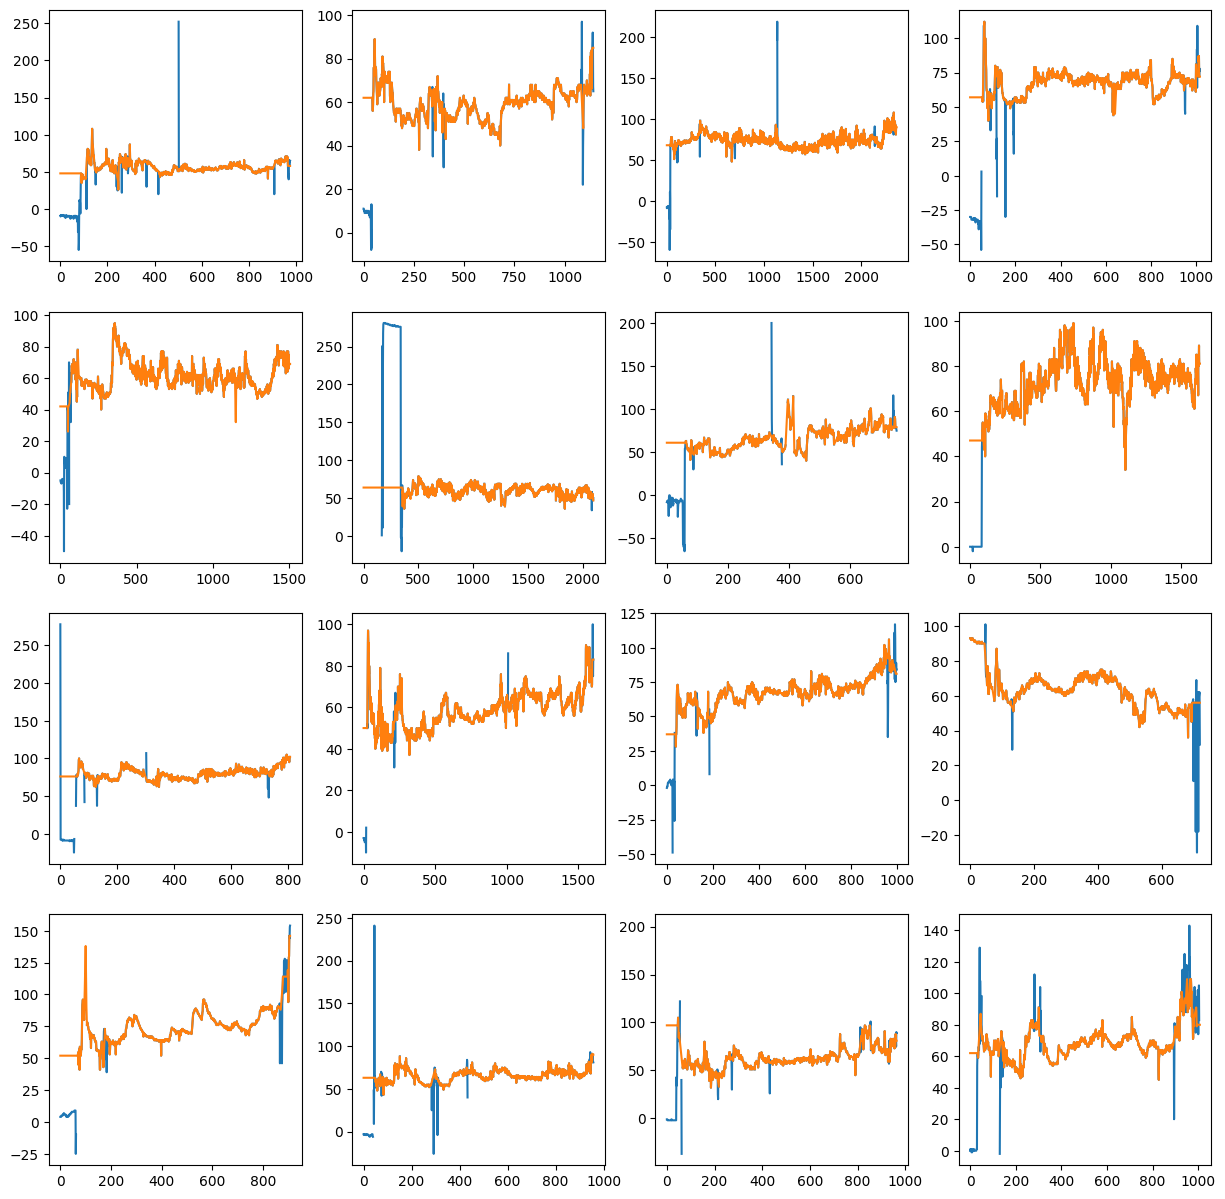

In [9]:
caseid = pd.read_csv(datapath + savepath +'dataset.csv', index_col=0).index.to_list()

track = ['Solar8000/ART_DBP']
#track = ['Solar8000/ART_MBP']
#track = ['Solar8000/ART_SBP']

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, case in enumerate(caseid):
    filepath = datapath+'vitaldb_tiva/'+str(case).zfill(4)+'.vital'

    vitaldata = vf.VitalFile(ipath = filepath, track_names = track)
    vitaldata = vitaldata.to_pandas(track_names=track,interval=10)

    axs[i // 4][i % 4].plot(vitaldata.to_numpy())

    vitaldata = outlierfilter(vitaldata, 20, 2, 20, 250)

    axs[i // 4][i % 4].plot(vitaldata)
    plt.show
    if i+1 >= 16:
        break

# SPO2

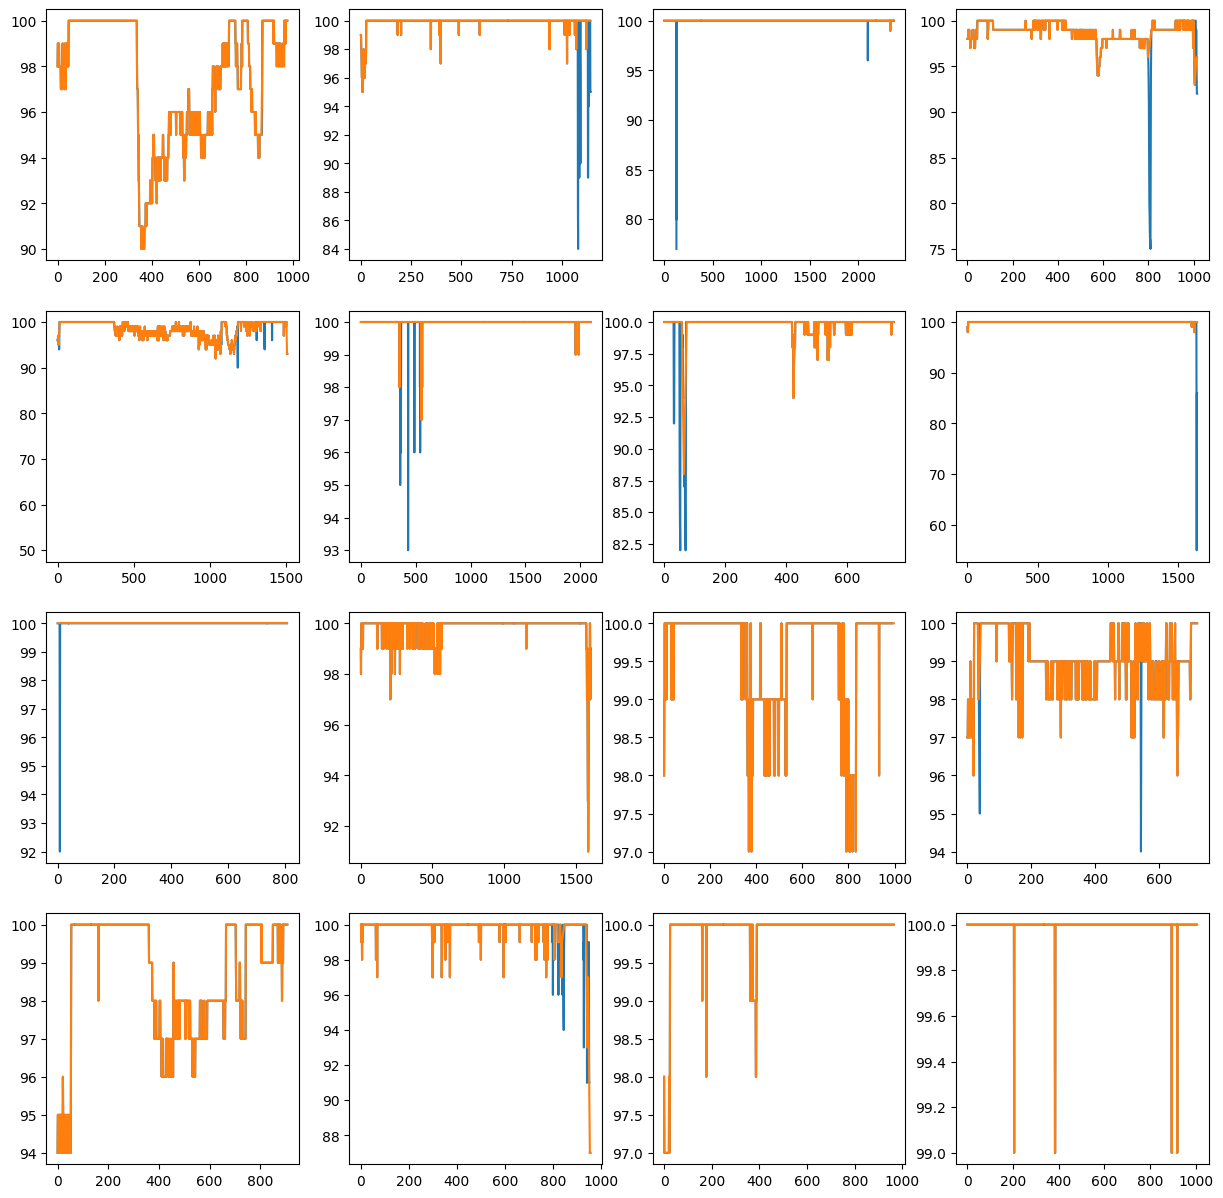

In [14]:
caseid = pd.read_csv(datapath + savepath +'dataset.csv', index_col=0).index.to_list()

track = ['Solar8000/PLETH_SPO2']

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, case in enumerate(caseid):
    filepath = datapath+'vitaldb_tiva/'+str(case).zfill(4)+'.vital'

    vitaldata = vf.VitalFile(ipath = filepath, track_names = track)
    vitaldata = vitaldata.to_pandas(track_names=track,interval=10)

    axs[i // 4][i % 4].plot(vitaldata.to_numpy())

    vitaldata = outlierfilter(vitaldata, 3, 2, 80, 100)

    axs[i // 4][i % 4].plot(vitaldata)
    plt.show
    if i+1 >= 16:
        break

# Heart Rate

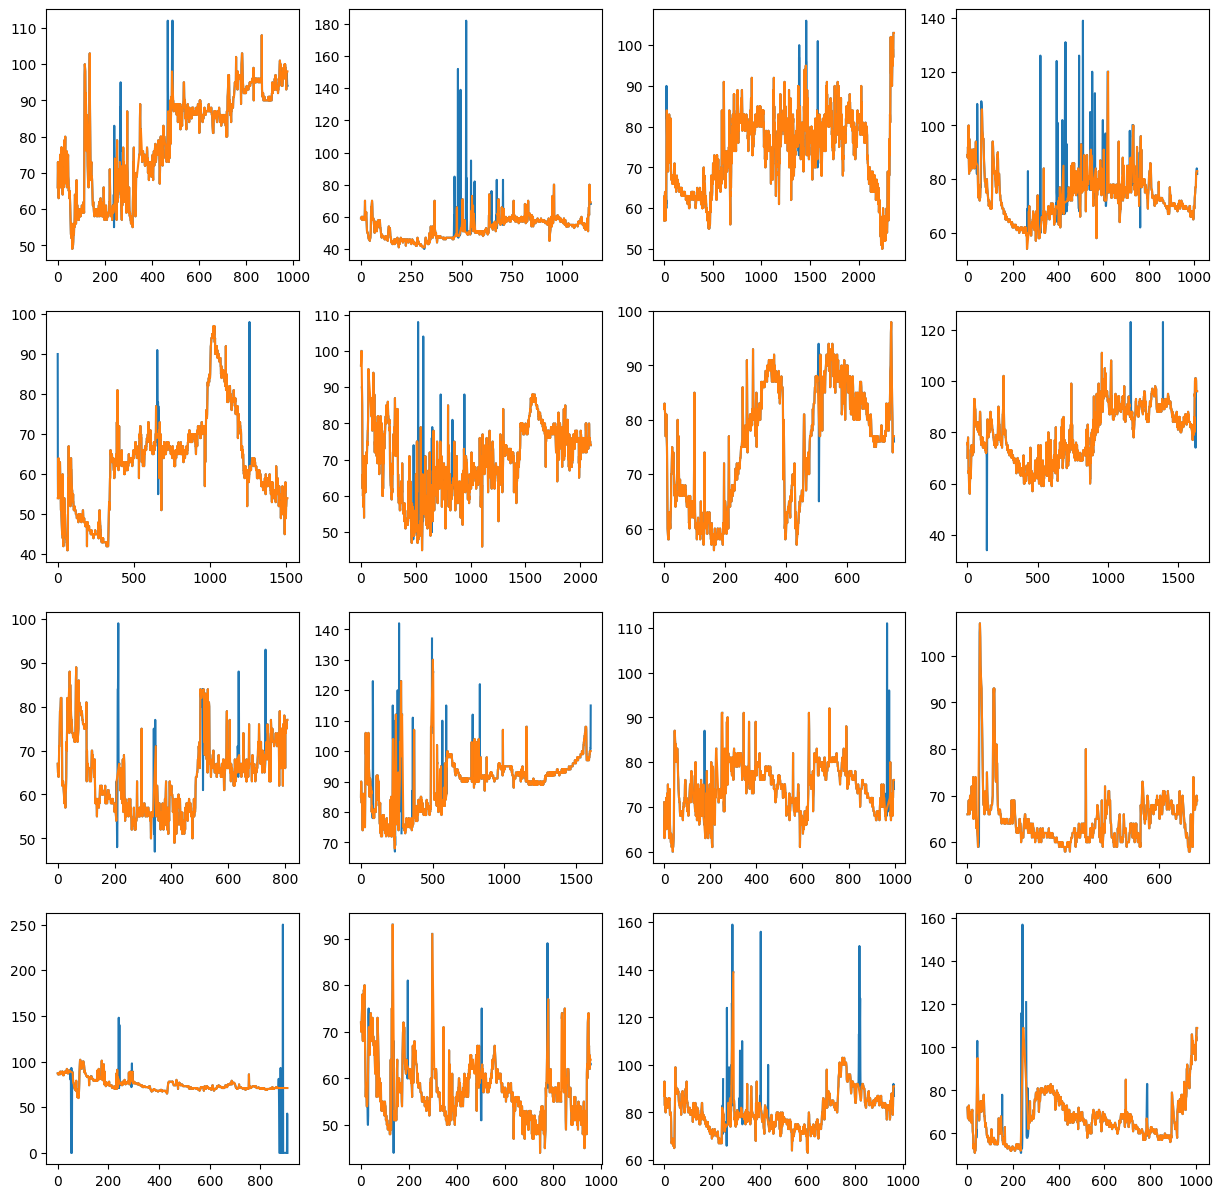

In [31]:
caseid = pd.read_csv(datapath + savepath +'dataset.csv', index_col=0).index.to_list()

track = ['Solar8000/HR']

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, case in enumerate(caseid):
    filepath = datapath+'vitaldb_tiva/'+str(case).zfill(4)+'.vital'

    vitaldata = vf.VitalFile(ipath = filepath, track_names = track)
    vitaldata = vitaldata.to_pandas(track_names=track,interval=10)

    axs[i // 4][i % 4].plot(vitaldata.to_numpy())

    vitaldata = outlierfilter(vitaldata, 20, 2, 40, 180)

    axs[i // 4][i % 4].plot(vitaldata)
    plt.show
    if i+1 >= 16:
        break

# O2

In [ ]:
'Primus/FEO2',              # Fraction of expired O2                                N       %
'Primus/FIO2',              # Fraction of inspired O2                               N       %

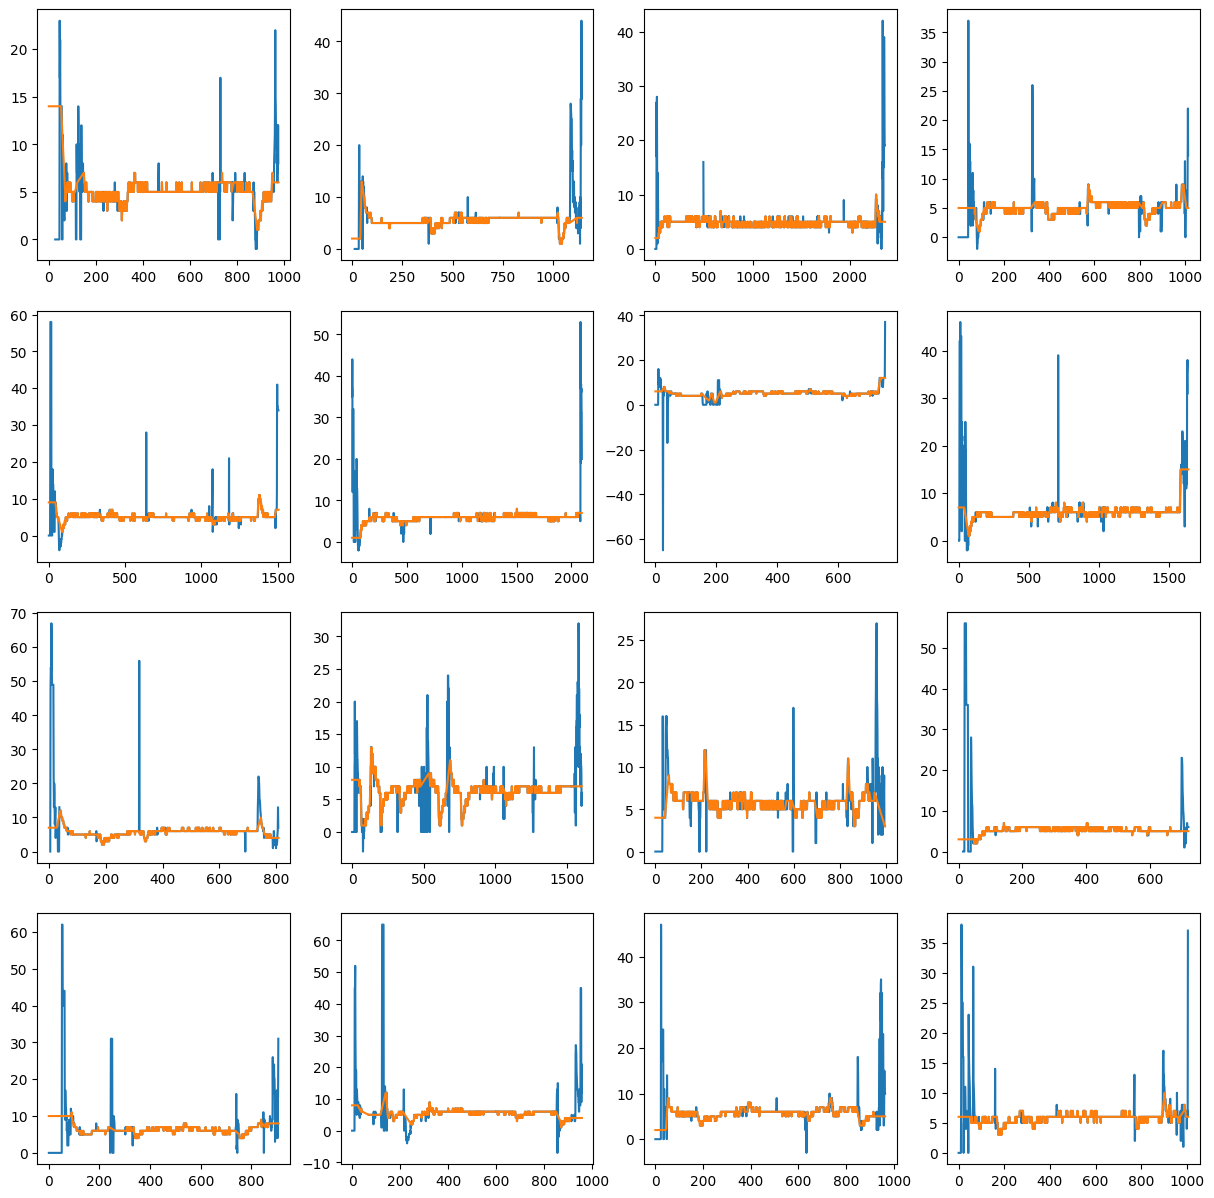

In [26]:
caseid = pd.read_csv(datapath + savepath +'dataset.csv', index_col=0).index.to_list()

track = ['Primus/FIO2', 'Primus/FEO2']

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, case in enumerate(caseid):
    filepath = datapath+'vitaldb_tiva/'+str(case).zfill(4)+'.vital'

    vitaldata = vf.VitalFile(ipath = filepath, track_names = track)
    vitaldata = vitaldata.to_pandas(track_names=track,interval=10)

    vitaldata = vitaldata['Primus/FIO2'] - vitaldata['Primus/FEO2']

    axs[i // 4][i % 4].plot(vitaldata.to_numpy())

    vitaldata = outlierfilter(vitaldata, 1, 2, 0, 15)

    axs[i // 4][i % 4].plot(vitaldata)
    plt.show
    if i+1 >= 16:
        break

# Bispektralindex

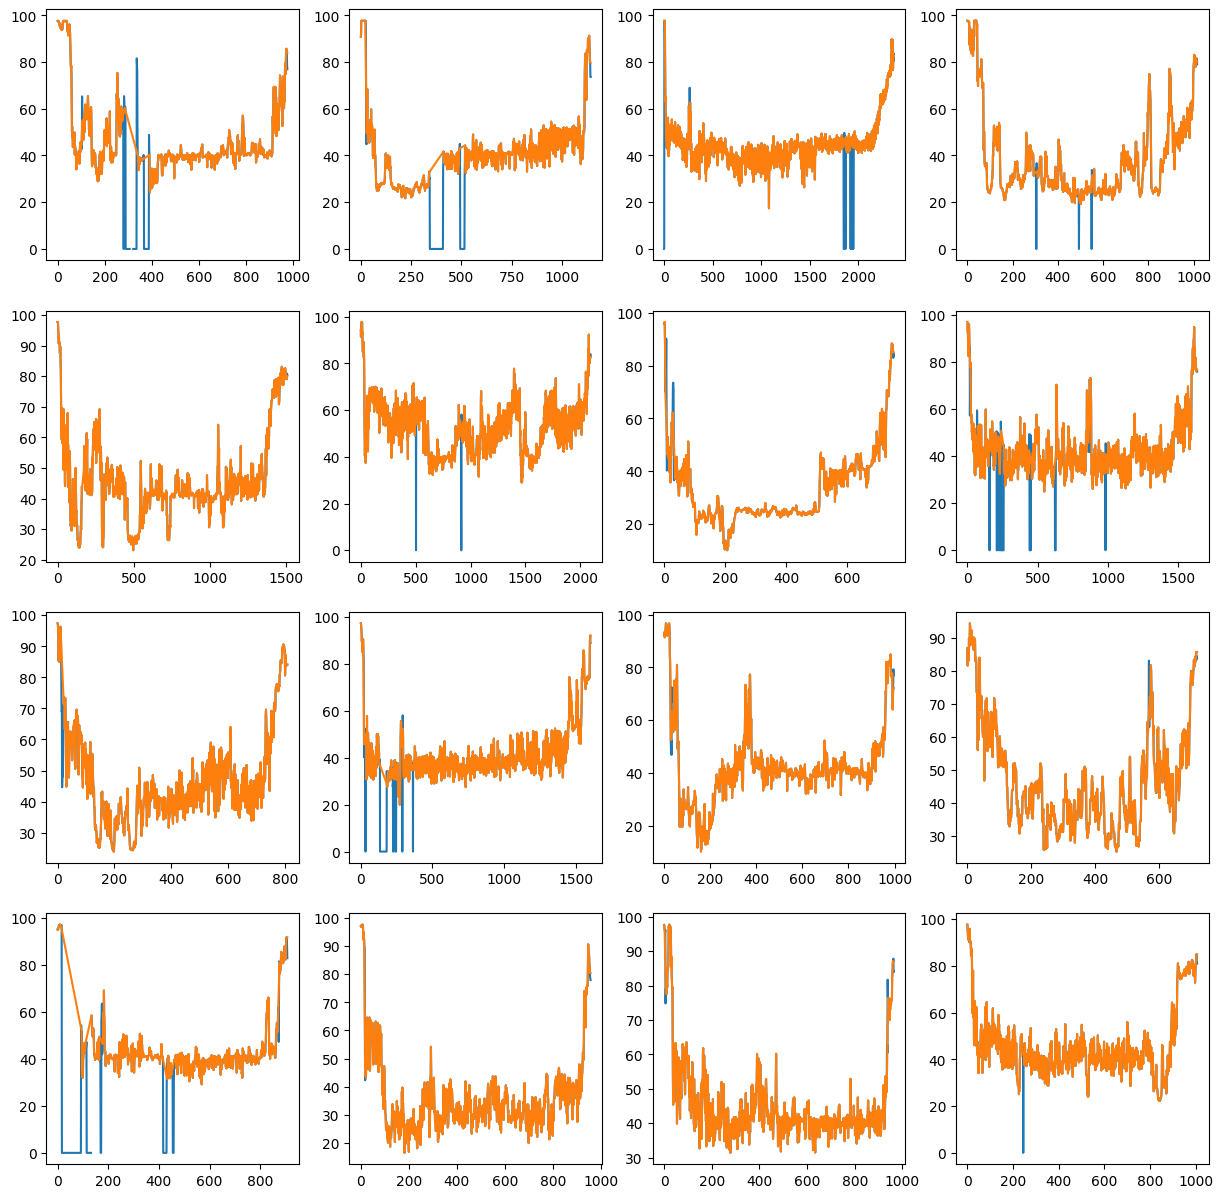

In [33]:
caseid = pd.read_csv(datapath + savepath +'dataset.csv', index_col=0).index.to_list()

track = ['BIS/BIS']

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, case in enumerate(caseid):
    filepath = datapath+'vitaldb_tiva/'+str(case).zfill(4)+'.vital'

    vitaldata = vf.VitalFile(ipath = filepath, track_names = track)
    vitaldata = vitaldata.to_pandas(track_names=track,interval=10)

    axs[i // 4][i % 4].plot(vitaldata.to_numpy())

    vitaldata = outlierfilter(vitaldata, 20, 2, 0, 100)

    axs[i // 4][i % 4].plot(vitaldata)
    plt.show
    if i+1 >= 16:
        break